In [108]:
import mxnet as mx
import logging
import numpy as np
import matplotlib.pyplot as plt 
logging.getLogger().setLevel(logging.DEBUG)  # logging to stdout

In [109]:
mnist = mx.test_utils.get_mnist()

mnist['test_data'].shape

INFO:root:train-labels-idx1-ubyte.gz exists, skipping download
INFO:root:train-images-idx3-ubyte.gz exists, skipping download
INFO:root:t10k-labels-idx1-ubyte.gz exists, skipping download
INFO:root:t10k-images-idx3-ubyte.gz exists, skipping download


(10000, 1, 28, 28)

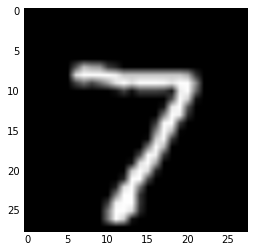

In [110]:
def plot_image(sample):
    plt.imshow(sample.reshape(28,28))
    plt.gray()
    plt.show()

plot_image(test_data[0])

In [136]:
batch_size = 100

train_data = mnist['train_data'].reshape((mnist['train_data'].shape[0], -1))
test_data = mnist['test_data'].reshape((mnist['test_data'].shape[0], -1))

train_iter = mx.io.NDArrayIter(train_data, train_data, batch_size, shuffle=True, label_name='label')
val_iter = mx.io.NDArrayIter(test_data, test_data, batch_size, label_name='label')

In [137]:
def build_graph(context=mx.cpu()):
    
    data = mx.sym.var('data')
    label = mx.sym.var('label')
    
    fc1  = mx.sym.FullyConnected(data=data, num_hidden=128)
    encoded = mx.sym.Activation(data=fc1, act_type="relu")

    fc2  = mx.sym.FullyConnected(data=encoded, num_hidden = 784)
    decoded  = mx.sym.LinearRegressionOutput(data=fc2, label=label)
    
    return mx.mod.Module(symbol=decoded, context=context, data_names=['data'], label_names=['label'])

In [138]:
model = build_graph()

In [139]:
model.fit(train_iter,  # train data
              eval_data=val_iter,  # validation data
              optimizer='adadelta',  # use SGD to train
              eval_metric='mse',
              batch_end_callback = mx.callback.Speedometer(batch_size, 100), # output progress for each 100 data batches
              num_epoch=100,
              begin_epoch=1)

INFO:root:Epoch[1] Batch [100]	Speed: 10518.16 samples/sec	mse=0.093995
INFO:root:Epoch[1] Batch [200]	Speed: 12290.43 samples/sec	mse=0.063180
INFO:root:Epoch[1] Batch [300]	Speed: 12460.73 samples/sec	mse=0.062758
INFO:root:Epoch[1] Batch [400]	Speed: 14123.28 samples/sec	mse=0.061791
INFO:root:Epoch[1] Batch [500]	Speed: 10008.78 samples/sec	mse=0.060487
INFO:root:Epoch[1] Train-mse=0.057258
INFO:root:Epoch[1] Time cost=5.385
INFO:root:Epoch[1] Validation-mse=0.055304
INFO:root:Epoch[2] Batch [100]	Speed: 9404.93 samples/sec	mse=0.053736
INFO:root:Epoch[2] Batch [200]	Speed: 10523.35 samples/sec	mse=0.050212
INFO:root:Epoch[2] Batch [300]	Speed: 13106.68 samples/sec	mse=0.047419
INFO:root:Epoch[2] Batch [400]	Speed: 11938.15 samples/sec	mse=0.044991
INFO:root:Epoch[2] Batch [500]	Speed: 13116.23 samples/sec	mse=0.043388
INFO:root:Epoch[2] Train-mse=0.041831
INFO:root:Epoch[2] Time cost=5.110
INFO:root:Epoch[2] Validation-mse=0.040826
INFO:root:Epoch[3] Batch [100]	Speed: 14055.64 sa

In [140]:
test_iter = mx.io.NDArrayIter(test_data, None, batch_size, label_name='label')
pred = model.predict(test_iter).asnumpy()

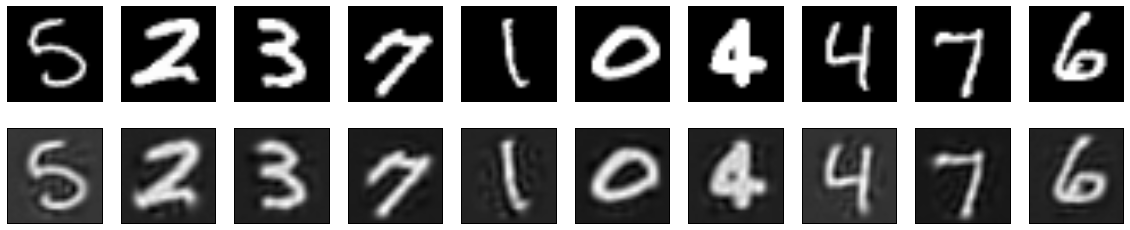

In [145]:
def plot_decoding(n=10):

    plt.figure(figsize=(20, 4))
    
    indices = np.random.choice(len(test_data), n)
    for idx, i in enumerate(indices):
        # display original
        ax = plt.subplot(2, n, idx + 1)
        plt.imshow(test_data[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display reconstruction
        ax = plt.subplot(2, n, idx + 1 + n)
        plt.imshow(pred[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()
    
plot_decoding(10)